In [2]:
# AI: Hardware (CPU, GPU) -- TensorFlow, PyTorch -- Keras
# RG: Hardware (CPU. GPU) -- OpenGL              -- Engine

In [4]:
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)

2.20.0


In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [8]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [14]:
# NN: 
#    Upoznavanje sa podacima 
#    -> Pretprocesiranje podataka 
#    -> Kreiranje i treniranje modela 
#    -> Evaluacija modela 
#    -> Koriscenje modela

# Upoznavanje sa podacima

In [15]:
train_images.shape

(60000, 28, 28)

In [10]:
train_labels.shape

(60000,)

In [11]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [12]:
test_images.shape

(10000, 28, 28)

In [13]:
test_labels.shape

(10000,)

# Pretprocesiranje podataka

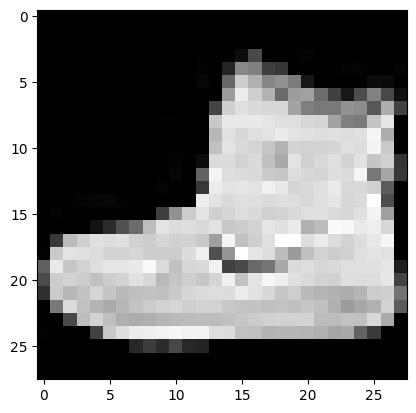

In [17]:
plt.figure()
plt.imshow(train_images[0], cmap='grey')
plt.show()

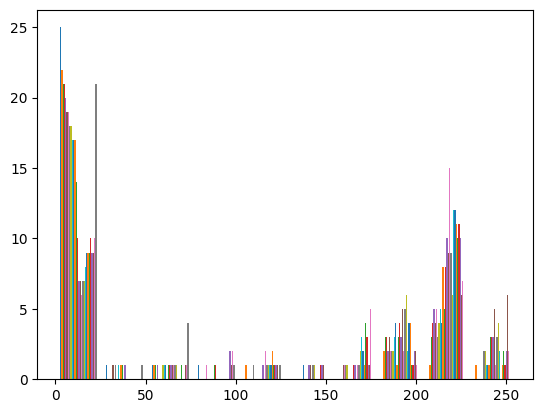

In [18]:
_ = plt.hist(train_images[0])

In [19]:
train_images = train_images / 255.0
test_images = test_images / 255.0

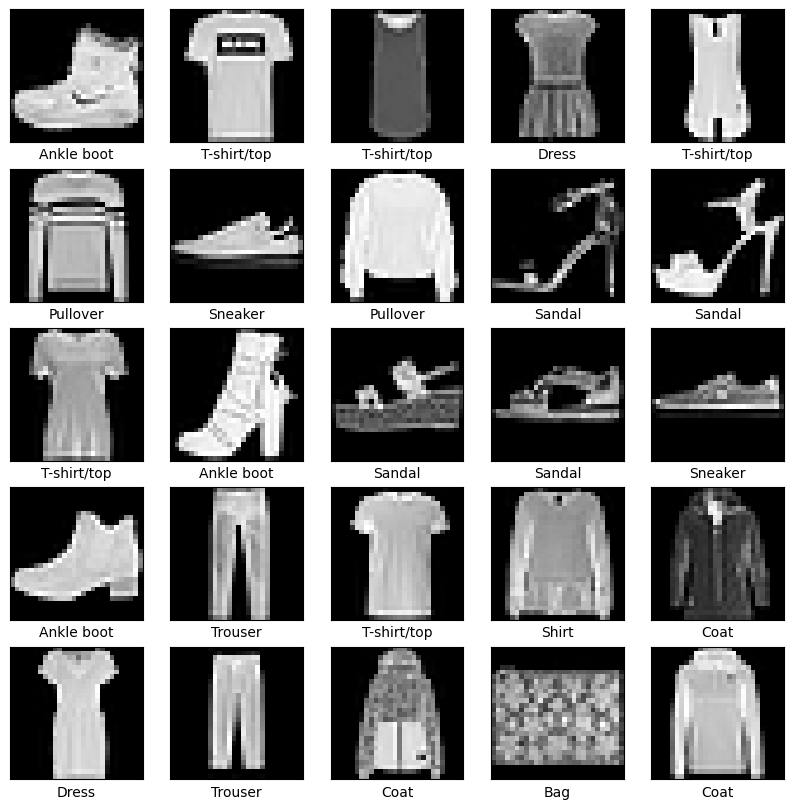

In [22]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap='grey')
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Kreiranje modela

In [32]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

/home/aleksa/Documents/VI/vi_venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [33]:
train_labels_cat = keras.utils.to_categorical(train_labels)
test_labels_cat = keras.utils.to_categorical(test_labels)
model.compile(optimizer='adam', loss=tf.losses.CategoricalCrossentropy(), metrics=['accuracy'])

In [34]:
model.fit(train_images, train_labels_cat, epochs=10)

Epoch 1/10


2025-09-06 18:05:09.144905: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8271 - loss: 0.4933
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8673 - loss: 0.3725
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8774 - loss: 0.3351
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8839 - loss: 0.3131
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8929 - loss: 0.2911
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8977 - loss: 0.2761
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9019 - loss: 0.2643
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9061 - loss: 0.2527
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9094 - loss: 0.2440
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9108 - loss: 0.2364


In [31]:
test_loss, test_acc = model.evaluate(test_images, test_labels_cat)
test_loss, test_acc

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8432 - loss: 0.4462


(0.4462055563926697, 0.8432000279426575)

# Regresija

In [35]:
import pandas as pd

In [36]:
dataset = pd.read_csv('auto-mpg.csv')
dataset.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model-year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70


In [37]:
# Pretprocesiranje_podataka -> Treniranje modela -> Evaluacija modela

In [38]:
dataset.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      2
weight          0
acceleration    0
model-year      0
dtype: int64

In [39]:
dataset = dataset.dropna()

In [40]:
dataset.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model-year      0
dtype: int64

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
dataset.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model-year
count,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000
mean,23.517172,5.457071,193.650253,104.189394,2973.000000,15.555808,76.027778
std,7.834368,1.703511,104.422387,38.402030,847.690354,2.758295,3.696969
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.375000,4.000000,104.750000,75.000000,2225.250000,13.800000,73.000000
50%,23.000000,4.000000,148.500000,92.000000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,263.250000,125.000000,3610.000000,17.125000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [44]:
X = dataset.drop(['mpg'], axis = 1)
Y = dataset[['mpg']]

In [45]:
X = (X - X.mean()) / X.std()

In [46]:
# train_dataset = dataset.sample(frac = 0.8, random_state=42)
# test_dataset = dataset.drop(train_dataset.index)

In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [48]:
X_train.shape

(316, 6)

In [50]:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=[X_train.shape[1]]),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)
])

In [55]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(0.001), loss='mae', metrics=['mae', 'mse'])

In [53]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 64)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,561 (10.00 KB)

 Trainable params: 2,561 (10.00 KB)

 Non-trainable params: 0 (0.00 B)

In [56]:
history = model.fit(X_train, Y_train, epochs=100)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.9770 - mae: 1.9770 - mse: 7.5982  
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.9275 - mae: 1.9275 - mse: 7.4129 
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.9278 - mae: 1.9278 - mse: 7.4523 
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.9161 - mae: 1.9161 - mse: 7.4496  
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.9211 - mae: 1.9211 - mse: 7.5435 
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.9211 - mae: 1.9211 - mse: 7.4455 
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.8996 - mae: 1.8996 - mse: 7.2533 
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.9386 - mae: 1.9386 - mse: 7.3259 
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.9188 - mae: 1.9188 - mse: 7.4417 
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.9057 - mae: 1.9057 - mse: 7.2978 
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/

In [57]:
model_output = history

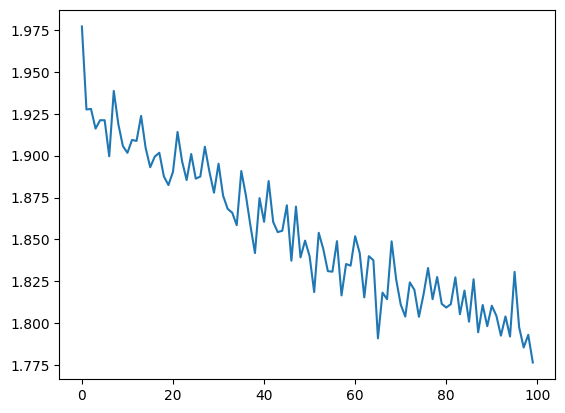

In [58]:
plt.plot(model_output.epoch, model_output.history['loss'])
plt.show()

In [60]:
loss_stop_callback = keras.callbacks.EarlyStopping(monitor='loss', patience=4)
model_output = model.fit(X_train, Y_train, epochs=1000, callbacks=[loss_stop_callback])

Epoch 1/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.8194 - mae: 1.8194 - mse: 7.0496 
Epoch 2/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.7969 - mae: 1.7969 - mse: 6.8422 
Epoch 3/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.7935 - mae: 1.7935 - mse: 6.8440 
Epoch 4/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.7844 - mae: 1.7844 - mse: 6.8632 
Epoch 5/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.7802 - mae: 1.7802 - mse: 6.8218 
Epoch 6/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.8007 - mae: 1.8007 - mse: 6.8797 
Epoch 7/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.7856 - mae: 1.7856 - mse: 6.7125 
Epoch 8/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.7813 - mae: 1.7813 - mse: 6.7721 
Epoch 9/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.7821 - mae: 1.7821 - mse: 6.8151 


In [61]:
model.evaluate(X_test, Y_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.9168 - mae: 1.9168 - mse: 7.5691 


[1.9167627096176147, 1.9167627096176147, 7.569129943847656]